Задача: нужно предсказать доход человека (больше $50000 или меньше) по результатам переписи населения

https://archive.ics.uci.edu/dataset/2/adult

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Train data

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 
           'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 
           'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', 
                 header = None, 
                 names = columns,
                 na_values = ' ?')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
print(f'Размер набора данных: {df.shape}')

Размер набора данных: (32561, 15)


Преобразуем столбец `income` в бинарное представление

In [6]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
df['income'] = df['income'].map({' <=50K' : 0,
                                 ' >50K' : 1})

In [8]:
df['income'].unique()

array([0, 1], dtype=int64)

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Test data

повторяем для тестового набора данных

In [11]:
test_df = test_df = pd.read_csv('adult.test',
                                header = None,
                                names = columns, 
                                na_values = ' ?',
                                skiprows = 1)

In [12]:
print(f'Размер набора данных: {test_df.shape}')

Размер набора данных: (16281, 15)


In [13]:
test_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [14]:
test_df['income'] = test_df['income'].map({' <=50K.': 0,
                                           ' >50K.' : 1})

In [15]:
test_df['income'].unique()

array([0, 1], dtype=int64)

In [16]:
test_df = test_df.dropna()

In [17]:
test_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Данные

Смотрим на распределение клаасов в итоговой переменной (отклике)

In [18]:
df['income'].value_counts(normalize=True)

income
0    0.751078
1    0.248922
Name: proportion, dtype: float64

видим, что класс `0` преобладает и составляет около 75%, а класс `1` около 25%.


отделяем целевую переменную на тестовых и обучающих данных

In [19]:
X = df.drop('income', axis = 1)
y = df['income']

X_test = test_df.drop('income', axis = 1)
y_test = test_df['income']

print(f'X: {X.shape} \ny: {y.shape}\
       \nX_test: {X_test.shape} \ny_test: {y_test.shape}')

X: (30162, 14) 
y: (30162,)       
X_test: (15060, 14) 
y_test: (15060,)


делим обучающие данные на обучающие и валидационные

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, random_state = 42)

print(f'X_train: {X_train.shape} \ny_train: {y_train.shape}\
       \n\nX_val: {X_valid.shape} \ny_val: {y_valid.shape}')

X_train: (24129, 14) 
y_train: (24129,)       

X_val: (6033, 14) 
y_val: (6033,)


In [21]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24129 entries, 19863 to 25528
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             24129 non-null  int64 
 1   workclass       24129 non-null  object
 2   fnlwgt          24129 non-null  int64 
 3   education       24129 non-null  object
 4   education-num   24129 non-null  int64 
 5   marital-status  24129 non-null  object
 6   occupation      24129 non-null  object
 7   relationship    24129 non-null  object
 8   race            24129 non-null  object
 9   sex             24129 non-null  object
 10  capital-gain    24129 non-null  int64 
 11  capital-loss    24129 non-null  int64 
 12  hours-per-week  24129 non-null  int64 
 13  native-country  24129 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 15060 entries, 0 to 16280
Data columns (total 14 columns):
 #   Column          Non-Null Coun

### CatBoost

catboost использует специальный объект `pool` для предоставления данных

`cat_features` - индексы категориальных признаков 

In [22]:
from catboost import Pool

train_pool = Pool(data = X_train, label = y_train, cat_features = [1, 3, 5, 6, 7, 8, 9, 13])
valid_pool = Pool(data = X_valid, label = y_valid, cat_features = [1, 3, 5, 6, 7, 8, 9, 13]) 
ёtest_pool = Pool(data = X_test, label = y_test, cat_features = [1, 3, 5, 6, 7, 8, 9, 13]) 

#### гиперпараметры

`iterations` - количество итераций (стоит брать побольше, для получения более точных моделей)

`learning_rate` - скорость обучения

`l2_leaf_reg` - коэффициент l2 регуляризации. Это ограничение на значение в листьях, чтобы они не улетали в бесконечность, это влияет на качество. по умолчанию 3.

`boosting_type` - бывает 2х видов: Plain - стандартный алгоритм бустинга и Ordered - отвечает за борьбу с переобучением (хорошо работает, когда мало данных, работает дольше чем plain, не стоит использовать на больших датасетах, так как прироста в качестве не будет. По стандарту, если объектов в наборе <50к, то используется ordered, иначе plain)

`boostrap_type` = Bernoulli и `subsample` = 0.5 - говорит о том, что на каждой итерации мы хотим использовать случайную подвыборку датасета, то есть на примере случайные 50 процентов. Это ускоряет обучение и добавляет увеличение рандома, что снижает переобучение 

`rsm` = 0.5- то же самое, только про признаки, то есть на каждой итерации выбираем 50 процентов признаков, на основе которых будем строить дерево

`random_strength` - если параметр не нулевой, то добавляем шум с указанной интенсивностью, чем больше параметр, тем интенсивнее шум, тем увеличиваем рандом. Не влияет на скорость, но влияет на качество

`one_hotmax_size` - определяет, когда иденцифицировать прихнак как one_hot, те признаки, у которых уникальных значений меньше значения, заданного в параметр, мы считаем за one hot

`max_ctr_complexity` - комбинирует признаки и пробует добавлять их как новые. 1 - не будет добавлять признаки, 2 - будет доавблять из 2 признаков, 3 - из трех и т.д.

`loss_fuction` - 'Logloss' или 'CrossEntropy', logloss - когда предсказываемый признак бинаррный, то есть [0, 1]. Если нужно предсказывать вероятности, то лучше ставить crossentropy


In [44]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations = 500, 
                           learning_rate = 0.01, 
                           depth = 6,
                           custom_loss = ['AUC', 'Accuracy'])

model.fit(train_pool, 
          eval_set = valid_pool, 
          verbose = 50,
          plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6839067	test: 0.6840022	best: 0.6840022 (0)	total: 141ms	remaining: 1m 10s
50:	learn: 0.4177757	test: 0.4192530	best: 0.4192530 (50)	total: 8.27s	remaining: 1m 12s
100:	learn: 0.3534566	test: 0.3549853	best: 0.3549853 (100)	total: 21s	remaining: 1m 22s
150:	learn: 0.3310807	test: 0.3327616	best: 0.3327616 (150)	total: 31s	remaining: 1m 11s
200:	learn: 0.3200375	test: 0.3221763	best: 0.3221763 (200)	total: 41.1s	remaining: 1m 1s
250:	learn: 0.3129520	test: 0.3156524	best: 0.3156524 (250)	total: 52s	remaining: 51.6s
300:	learn: 0.3080820	test: 0.3112668	best: 0.3112668 (300)	total: 1m 1s	remaining: 40.7s
350:	learn: 0.3037600	test: 0.3072576	best: 0.3072576 (350)	total: 1m 11s	remaining: 30.3s
400:	learn: 0.3006386	test: 0.3045842	best: 0.3045842 (400)	total: 1m 21s	remaining: 20.1s
450:	learn: 0.2980319	test: 0.3024538	best: 0.3024538 (450)	total: 1m 31s	remaining: 9.93s
499:	learn: 0.2957132	test: 0.3004941	best: 0.3004941 (499)	total: 1m 41s	remaining: 0us

bestTest = 0.30

в выводе указаны ошибка на лерне(ошибка метрики которую мы оптимизируем на трйне), ошибка на тесте (ошибка метрики которую мы оптимизируем на тесте) и лучший результат. Точка на графике - точка переобучения, все деревья построенные псоле этой точки бесполезные.

### Кросс Валидация 

In [48]:
from catboost import cv

params = {'loss_function' : 'Logloss',
          'iterations' : 500,
          'learning_rate' : 0.01,
          'depth' : 6}

cv_data = cv(params = params, 
             pool = train_pool,
             fold_count = 5,
             shuffle = True,
             partition_random_seed = 42, 
             plot = True, 
             stratified = True, # следит за сбалаансированным распредлением фолдов
             verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.3058424319
bestIteration = 499

Training on fold [1/5]

bestTest = 0.3073486349
bestIteration = 499

Training on fold [2/5]

bestTest = 0.3005474088
bestIteration = 499

Training on fold [3/5]

bestTest = 0.2985246661
bestIteration = 499

Training on fold [4/5]

bestTest = 0.3050943488
bestIteration = 499



In [50]:
cv_data.head(10)

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.683487,0.000083,0.683467,0.000074
1,1,0.673264,0.000259,0.673213,0.000203
2,2,0.663463,0.000390,0.663408,0.000317
3,3,0.654918,0.000491,0.654825,0.000571
4,4,0.645751,0.000758,0.645639,0.000726
5,5,0.637144,0.000669,0.637030,0.000538
6,6,0.628579,0.000856,0.628449,0.000522
7,7,0.620249,0.000853,0.620153,0.000601
8,8,0.612295,0.000838,0.612203,0.000819
9,9,0.604720,0.000897,0.604688,0.000595


по полученной таблице можем вычислить например минимум среднего логлосса на тесте, чтобы опредлеить итерацию на которой у нас происходит переобучение, чтобы потом обрезать модель по этой итерации 

In [54]:
best_val = cv_data['test-Logloss-mean'].min()
best_iter = cv_data['test-Logloss-mean'].values.argmin()

print(f'Лучшее значение logloss на валидации: {best_val} на шаге {best_iter}')

Лучшее значение logloss на валидации: 0.3034714981000148 на шаге 499


### Поиск по сетке

In [55]:
from sklearn.model_selection import GridSearchCV

param_gcv = {'learning_rate' : [0.1, 0.01, 0.001]}

clf = CatBoostClassifier(iterations = 100,
                         depth = 6,
                         cat_features = [1, 3, 5, 6, 7, 8, 9, 13],
                         verbose = False)

gcv = GridSearchCV(clf, param_grid = param_gcv, cv = 5)

results = gcv.fit(X_train, y_train)
results.best_estimator_.get_params()

{'iterations': 100,
 'learning_rate': 0.1,
 'depth': 6,
 'verbose': False,
 'cat_features': [1, 3, 5, 6, 7, 8, 9, 13]}

### Предсказания

In [58]:
model = CatBoostClassifier(iterations=100, 
                           learning_rate = 0.1, 
                           depth = 6,
                           custom_loss = ['AUC', 'Accuracy'])

model.fit(train_pool,
          eval_set = valid_pool,
          verbose = False, 
          plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

`predict_proba` возвращает матрицу с вероятностяими (вероятность одного класса и второго)

In [59]:
print(model.predict_proba(X_test))

[[0.99459309 0.00540691]
 [0.75412224 0.24587776]
 [0.65040476 0.34959524]
 ...
 [0.21217755 0.78782245]
 [0.8616531  0.1383469 ]
 [0.24746414 0.75253586]]


обычный `predict` как обычно возвращает значение 1 или 0 по порогу в 0.5

In [61]:
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 0 ... 1 0 1]


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.78      0.62      0.69      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060



`get_roc_curve` для получения ROC-кривой (Receiver Operating Characteristic curve) для модели. ROC-кривая показывает зависимость между долей ложных срабатываний (False Positive Rate, FPR) и долей истинных срабатываний (True Positive Rate, TPR) при различных порогах классификации
curve: Возвращает кортеж, содержащий три элемента:
- fpr: False Positive Rate (доля ложных срабатываний).
- tpr: True Positive Rate (доля истинных срабатываний).
- thresholds: Пороги классификации.

`get_fnr_curve` используется для получения кривой ложных негативных срабатываний (False Negative Rate, FNR) на основе ROC-кривой. FNR показывает долю ложных негативных срабатываний при различных порогах классификации.

`get_fpr_curve` используется для получения кривой ложных положительных срабатываний (False Positive Rate, FPR) на основе ROC-кривой. FPR показывает долю ложных положительных срабатываний при различных порогах классификации.

In [66]:
from catboost.utils import get_roc_curve
from catboost.utils import get_fnr_curve
from catboost.utils import get_fpr_curve

curve = get_roc_curve(model, test_pool)
(fpr, tpr, thresholds) = curve

(thresholds, fnr) = get_fnr_curve(curve = curve)
(thresholds, fpr) = get_fpr_curve(curve = curve)

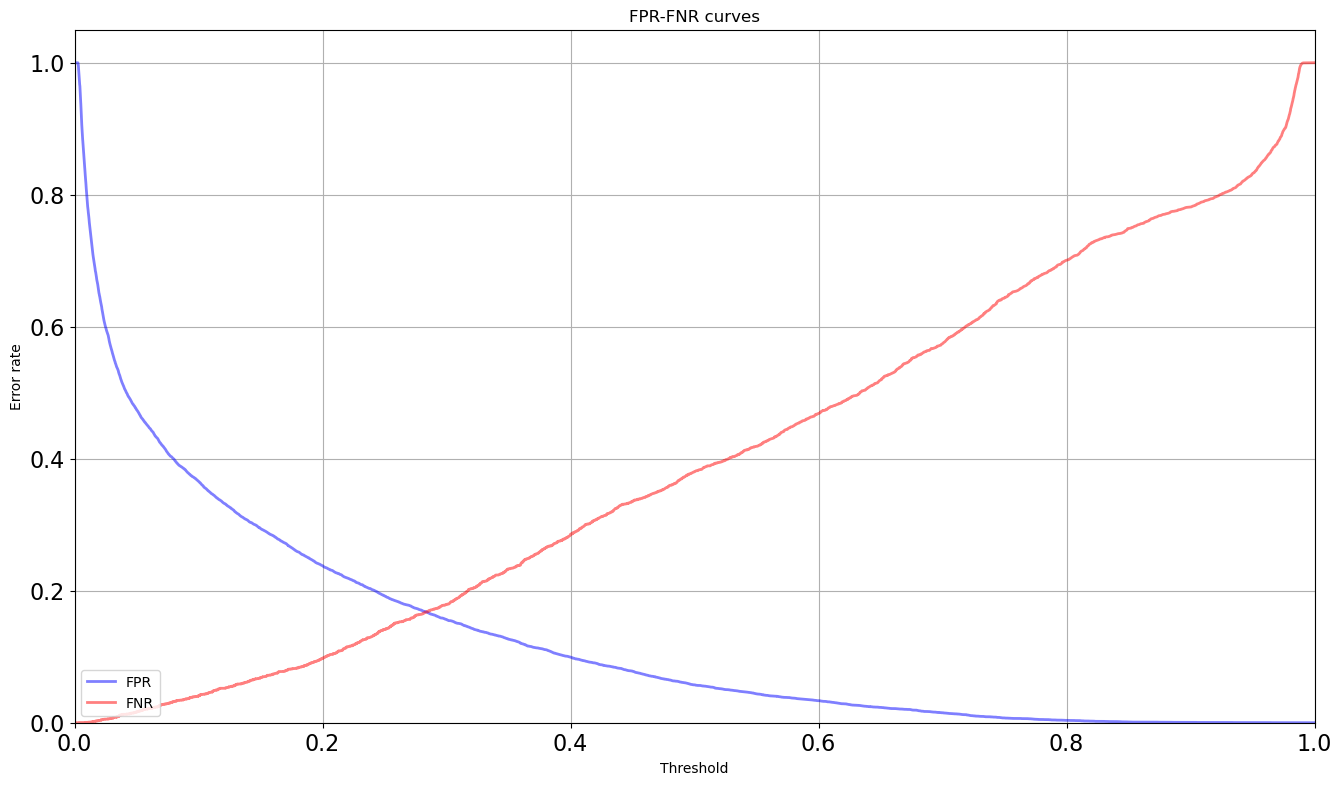

In [71]:
plt.figure(figsize = (16, 9))
style = {'alpha' : 0.5,
         'lw' : 2}
plt.plot(thresholds, fpr, color = 'blue', label = 'FPR', **style)
plt.plot(thresholds, fnr, color = 'red', label = 'FNR', **style)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.grid(True)

plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.title('FPR-FNR curves')
plt.legend(loc = 'lower left') 

сделаем допущение, что мы ошибаемся на 1 процент, тогда `select_threshold` вернет порог при котором будет получена такая метрика 

In [84]:
from catboost.utils import select_threshold

print(select_threshold(model, test_pool, FNR=0.01))
print(select_threshold(model, test_pool, FPR=0.01))

0.035831357925887354
0.7279598689045056


### Важность признаков

`get_feature_importance` информация о признаках, которые сыграли большую роль. Эти значения получается из следущего: на сколько изменились предсказания если поменяется значение признака.  

In [87]:
model.get_feature_importance(prettified = True)

,Feature Id,Importances
0,relationship,27.094927
1,capital-gain,15.817438
2,age,11.334736
3,education-num,11.046378
4,occupation,8.764922
5,capital-loss,6.199801
6,marital-status,6.197312
7,hours-per-week,5.900784
8,workclass,2.457372
9,education,1.667648


есть еще один способ. В этом случае метод `get_feature_importance` с параметрами `test_pool` и `LossFunctionChange` смотрит не на изменения предсказаний, а на изменение функции, которую мы оптимизурем. Если появятся отрицательные значения - то значит, что от изменения признака с отрицательным значением функция ухудшается, поэтому возможно их стоит удалить из набора данных.


In [88]:
model.get_feature_importance(test_pool,
                             'LossFunctionChange',
                             prettified = True)

,Feature Id,Importances
0,relationship,0.051834
1,capital-gain,0.043384
2,age,0.015426
3,education-num,0.014051
4,occupation,0.011764
5,capital-loss,0.011625
6,hours-per-week,0.008185
7,marital-status,0.007777
8,workclass,0.001390
9,education,0.001034
